# Mathematical tools for Data Scientists
We will review the following topics: 
-  Probabilities and Markov chains
-  Linear algebra, Spectral decomposition, SVD, and Principal Component Analysis
-  Optimization, Regularization, and Data approximation

These are just very basic overviews and are by no means sufficient. 
Note also, that you may want to copy these notebooks locally when working on them to avoid conflicts with later versions. 

In [1]:
import matplotlib.pyplot as plt # usefull for some display
import numpy as np # some mathematical things
%matplotlib inline

# Some self-defined functions for displaying vectors
def plot_nice_vectors(my_vectors):
    # A vector is represented as an array of 2 elements
    # my_vectors is a list of 2d-arrays
    nb_vec = len(my_vectors)
    Xvalues,Yvalues = np.vstack(my_vectors).T # returns separate arrays for the x- and y-coordinates 
    # Generate anchor for the vectors
    Xanchor,Yanchor = np.zeros((nb_vec,2))
    plt.quiver(Xanchor, Yanchor, Xvalues, Yvalues, range(nb_vec), angles='xy', scale_units='xy', scale=1) 

## Review of linear algebra
Since a lot of problems can be seen as linear (inverse) problems -- e.g. sparse approximation, scientific computing, polynomial approximation/interpolation -- we review here the main ideas, that are mandatory for further processing. 

### Vector spaces and basis
Let $\mathbb{K}$ ($=\mathbb{R}$ or $\mathbb{C}$) be a field and $E$ be an additive commutative group. We say that $E$ is a field over $\mathbb{K}$ is 
1. For all $\lambda \in \mathbb{K}$ and $v \in E$, $\lambda v \in E$,
2. For all $\lambda, \mu \in \mathbb{K}$ and $u \in E$, $(\lambda + \mu)v = \lambda v + \mu v$,
3. For all $\lambda \in \mathbb{K}$ and $u,v \in E$, $\lambda (u+v) = \lambda u + \lambda v$,
4. For all $\lambda, \mu \in \mathbb{K}$ and $u \in E$, $(\lambda \cdot \mu)v = \lambda \cdot(\mu \cdot v)$,
5. If $1$ denotes the scalar multiplicative identity, then $1 \cdot v = v$, for all $v \in E$. 

In other words, we can multiply every scalars together, distribute them over the vectors, etc ... 

Let $\mathcal{V} = (v_1, \cdots, v_n)$ ($n$ not necessarily finite) be a collection of $n$ vectors in $E$. We say that $\mathcal{V}$ is <font color=blue>linearly independent</font> if 
$$
\sum c_i v_i = 0 \Leftrightarrow c_i = 0, \quad \text{for all } i.
$$

** Exercise: ** Give an example of vector space that has a family of infinitely many linearly independent vectors. 

We say that $\mathcal{V}$ is a <font color=blue>generating set</font> for $E$ if 
$$
\forall v \in E, \exists (c_i)_i \in \mathbb{K}^n: v = \sum c_i \cdot v_i.
$$

A family that is both __linearly independent__ and __generating__ is said to be a <font color=blue>basis</font>. The size of the basis is called the <font color=blue> dimension </font> of the vector space. 

**Exercise: ** Prove that the coefficients representing a given vector on a given basis are unique. 

** Example: ** Let $\mathbb{R}_n[x]$ denote the vector space (prove that it is indeed a vector space!) of polynomial of degree at most $n$ over the field of real numbers. It has dimension $n+1$ since every degree $n$ polynomial can be written as $a_0 x^0 + a_1 x^1 + \cdots + a_n x^n$ and the family $(x^i)_{0 \leq i \leq n}$ is linearly independent (prove this!)

** Exercise: ** Let $n \in \mathbb{N}$ and $0 \leq i \leq n$ and let $e_i = \sum_{j=0}^ix^j \in E := \mathbb{R}_n[x]$. Is the family $(e_i)_{i=0}^n$ linearly independent in $E$? A generating set for $E$? A basis for $E$?

Having a basis at hand helps us represent vectors the way we are used to: with an ordered set of coefficients!

**Example: ** $2+2x+x^2 \in \mathbb{R}_2[x]$ corresponds to the representation
* $(2,2,1)$ in the basis $\left( 1,x,x^2  \right)$ and to 
* $(0,1,1)$ in the basis $\left( 1, 1+x, 1+x+x^2 \right)$

**In this example, we see that the choice of basis may have an influence in the representation and hence on further processing of the data!**




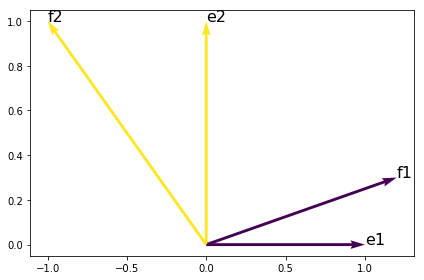

In [16]:
e1 = np.array([1,0])
e2 = np.array([0,1])
plt.figure()
plot_nice_vectors([e1,e2])
f1 = np.array([1.2,0.3])
f2 = np.array([-1,1])
plot_nice_vectors([f1,f2])

# Some automatic processing
Xvalues,Yvalues = np.vstack([e1,e2,f1,f2]).T
Xmin = np.min(Xvalues)
Xmax = np.max(Xvalues)
Ymin = np.min(Yvalues)
Ymax = np.max(Yvalues)
Xrange = Xmax-Xmin
Yrange = Ymax-Ymin
graph_extension_ratio = 0.05
Xmin -= graph_extension_ratio*Xrange
Ymin -= graph_extension_ratio*Yrange
Xmax += graph_extension_ratio*Xrange
Ymax += graph_extension_ratio*Yrange
plt.text(e1[0], e1[1],"e1",fontsize=16)
plt.text(e2[0], e2[1],"e2",fontsize=16)
plt.text(f1[0], f1[1],"f1",fontsize=16)
plt.text(f2[0], f2[1],"f2",fontsize=16)
plt.axis([Xmin, Xmax, Ymin, Ymax])

plt.tight_layout()

### Matrices and linear applications
Let $E,F$ be vector spaces on $\mathbb{K}$. We say that a mapping $\mathcal{A}: E \to V$ is a linear mapping if $$\mathcal{A}(u+t\cdot v) = \mathcal{A}(u) + t\cdot \mathcal{A}(v), \quad \text{for all } u,v \in E \text{ and } t \in \mathbb{K}.$$

Given a basis $\mathcal{B}_E = (e_j)_j$ for $E$, the sole knowledge of $\mathcal{A}(e_j)$ for all $j$'s is sufficient to completely characterize a linear map. Indeed, noticing that every vector $v \in E$ can be written (uniquely!) as $v = \sum c_j e_j$ and together with the linearity property, it follows that 
$$
\mathcal{A}(v) = \mathcal{A}(\sum c_j e_j) = \sum c_j \mathcal{A}(e_j) = \sum c_j u_j, 
$$
where we have defined $u_j = \mathcal{A}(e_j)$ the image of the basis vectors via through $A$. Since we assumed $F$ to be a vector space, it has a basis $\mathcal{B}_F = (f_i)$ on which we can represent the images $u_j = \sum_i a_{ij}f_i$. The matrix $A$ with coefficients $a_{ij}$ characterize the linear map $\mathcal{A}$ in the basis $\mathcal{B}_E$ and $\mathcal{B}_F$. 

Assuming we are given alternate basis $\mathcal{B}_E'$ and $\mathcal{B}_F'$ for $E$ and $F$ respectively, the mapping $\mathcal{A}$ can be represented with the matrix $A' = QAP^{-1}$ where $Q$ is the transition matrix from basis $\mathcal{B}_F$ to $\mathcal{B}_F'$ and $P$ the transition matrix from $\mathcal{B}_E$ to $\mathcal{B}_E'$ (i.e. the matrix with the vectors $e_j$ expressed in the basis vectors $e_j'$).

_N.B._ Changing the coordinate system will be important later on: PCA _rotate_ the space according to the variance of the data, SVD _splits_ the domain between the image and the kernel of a (non-squared) matrix. 

Two matrices that are related to one another by the _change of basis_ relation $B = QAP^{-1}$ are said to be <font color=blue>equivalent</font>. They represent the same linear application, but in different basis! If moreover $P = Q$ we say that the matrices are <font color=blue>similar</font>.

**Exercise: ** Consider the following application $\mathcal{A}: \mathbb{R}^2 \to \mathbb{R}^3$ represented by the following matrix (in the canonical basis)
$$
A = \left( \begin{array}{cc} 1 & 2 \\ 0 & 1 \\ 2 & 0  \end{array} \right).
$$
Let $\mathcal{B}_{\mathbb{R}^3}' := \left((1,0,3)^T, (2,1,0)^T, (0,0,1)^T \right)$ (prove that this is indeed a basis!).
What is the matrix representing $\mathcal{A}$ from the canonical basis of $\mathbb{R}^2$ to this new basis? 



In [17]:
# We first build the original matrix 
A = np.matrix('1 2; 0 1; 2 0')
# print(A)
# Create the transition matrix
P = np.matrix('1 -2 0; 0 1 0; -2 4 1')
print('P is a valid transition matrix, as its Determinant is {}'.format(np.linalg.det(P)))
# print(P)
Aprime = np.matmul(P,A)
print(Aprime)

P is a valid transition matrix, as its Determinant is 1.0
[[1 0]
 [0 1]
 [0 0]]



### Eigenvalue decomposition and the spectral theorem
<font color=blue>Eigenspaces</font> of a matrix $A$ are vector subspaces of the vector space $E$ that are stable by iterative applications of the linear operator $A$. Formally, we have that $v \in E$ is an <font color=blue>eigenvector</font> with <font color=blue>eigenvalue</font> $\lambda \in \mathbb{K}$ if $v \neq 0$ and $A\cdot v = \lambda \cdot v$. 
In particular, $\lambda$ is an eigenvalue of $A \Leftrightarrow A-\lambda I$ is singular $\Leftrightarrow \operatorname{det}(A-\lambda I) = 0$. 

**Exercise: ** Compute the eigenvalues and eigenvectors of the following matrices 
$$ 
A = \left( \begin{array}{cc} 1 & 4 \\ 1 & 1 \end{array} \right).
$$
Verify your results in Python.

__Theorem__ If $A$ is <font color=blue>Hermitian</font> (i.e. $A^* = A$), there exists an orthonormal basis of $E$ consisting of eigenvectors of $A$. Each eigenvalue is real.

As a consequence, the matrix $A$ is similar to the diagonal matrix $D = \operatorname{diag}(\lambda_1, \cdots, \lambda _n)$ whose elements ar ethe eigenvalues (not necessarilly distinct) of $A$: $A = PDP^{-1}$ where $P$ is the matrix containing (column-wise) the eigenvectors of $A$. 

**Exercise: ** Let $A$ be the following matrix (it was generated at random from normal distributions with variance $0.5$)
$$
A = \left( \begin{array}{cccc} -0.64 & 0.14 & 1.47 & 1.16 \\ -0.28 & -0.65 & 0.97 & 0.81 \\ 0.73 & 0.23 & 0.74 & 0.65 \end{array} \right).
$$
Compute $B = A \cdot A^T$ and its spectral decomposition. 


### Singular value decomposition and PCA 

A matrix $A \in \mathbb{R}^{m \times n}$ admits a decomposition 
$$A = U\Sigma V^T,$$ where $\Sigma$ is a diagonal matrix of singular values and $U$ and $V$ are the left and right singular vectors. Remember the change of basis we were talking about? We see it appearing here! 


## Optimization and data approximation

### Data interpolation as a linear system 

Assume you are given a sequence of points/samples (a database) $\mathcal{D} = (x_i,y_i)_{i=1}^N$ and that you know that the $y_i$'s are coming from a function $f$ in some finite-dimensional function (vector!) space $E$ with basis vectors $(e_1,\cdots, e_n)$, i.e. $y_i = f(x_i) = \sum_{j=1}^n c_j e_j(x_i) $. Note that in cases of function spaces, the basis vectors are themselves functions!
By stacking all the sampled points on top of each other, we arrive at the following linear system
$$
\textbf{y} = A \textbf{c}, 
$$
where $\textbf{y} = (y_1, \cdots, y_N)^T$ is the data vector, $\textbf{c} = (c_1, \cdots, c_n)^T$ is the vector of coefficients of the function $f$, and $A = (a_{ij})_{1\leq i \leq N; 1 \leq j \leq n}$ with $a_{ij} = e_j(x_i)$ is the sensing matrix. 

Therefore _approximating_ or _learning_ or _interpolating_ the function $f$ from the datapoints corresponds to simply inversing the system above. If the data points are all different from one another, and $n = N$, then the matrix $A$ is invertible. (However it becomes less and less stable as the gap between the sampling points gets smaller and smaller, at least in polynomial approximation problems)


* Show some examples of data interpolation problems with polynomial and RBF basis
* Compute a few condition numbers 

What happens in case the measurement device is not ideal? Problem with noise. 

* Show that everything can be written as a linear system on a basis
* Condition number of the linear system
* Problem with overfitting

### Least squares and data approximation

* Overdetermined linear system 
* Pseudo inverse

### Regularization

* Prior knowledge and signal model
* Tikhonov regularization 
* Lagrange formulation or optimization with constraints
* Cross validation and model selection

## Graph-based representations

* Coarse definition
* Directed, undirected graphs
* Spectral clustering: definition of a similarity measure, data points as vertices of a graph, affinity matrix and graph Laplacian, spectral decomposition

## Probability theory and Markov property

### Basics of probability

* Probability distribution
* Marginal
* Conditional probability
* Bayes' theorem

### Markov model

* What is a Markov chain
* Graph representation
* Perron Frobernius theorem

In [21]:
ex_Matrix = np.matrix('1 4; 1 1')
D,U = np.linalg.eig(ex_Matrix)
print('Here are the eigenvalues {}'.format(D))
print('And here is the associated transition matrix \n P = {}'.format(np.sqrt(5)*U)) # added a little factor for better readability

Here are the eigenvalues [ 3. -1.]
And here is the associated transition matrix 
 P = [[ 2. -2.]
 [ 1.  1.]]
